In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:

from os import scandir

def cropfile(pathin,pathout, x, y, w, h,ws):
    img = cv2.imread(pathin)
    if ws:
        cv2.imwrite(pathout, img)
    else:
        test_images.append(img)

#Función para encontrar todas las imagenes que están en un directorio    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1,14):
    path = "Imagenes/Completo/Switch"+str(i)+"/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    j = 0
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"rename/" + "S"+str(i)+"-"+str(j) + ".png" # archivo crop    
        j +=1
        print(filec)
        cropfile(filea, filec, 250, 90, 300,200,1)
    cropfile(path+files[0],filec,250,90,300,200,0)

    
        



In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng

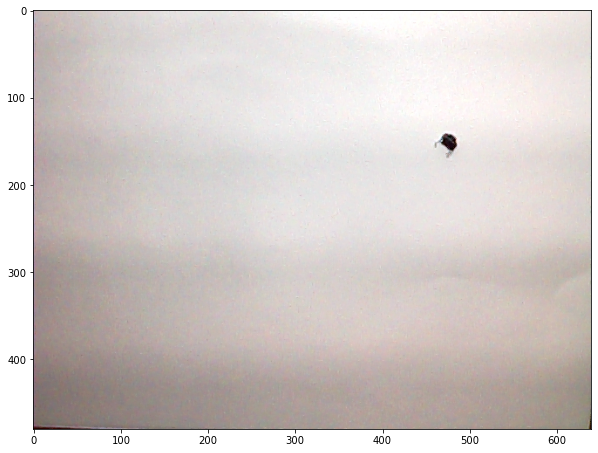

In [1]:
import cv2
from matplotlib import pyplot as plt
src = cv2.imread("Imagenes/Completo/Switch3/rename/S3-12.png")
# Convert image to gray and blur it
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(src_gray, (3,3))
source_window = 'Source'
plt.figure(figsize=[10,10])
plt.imshow(src)

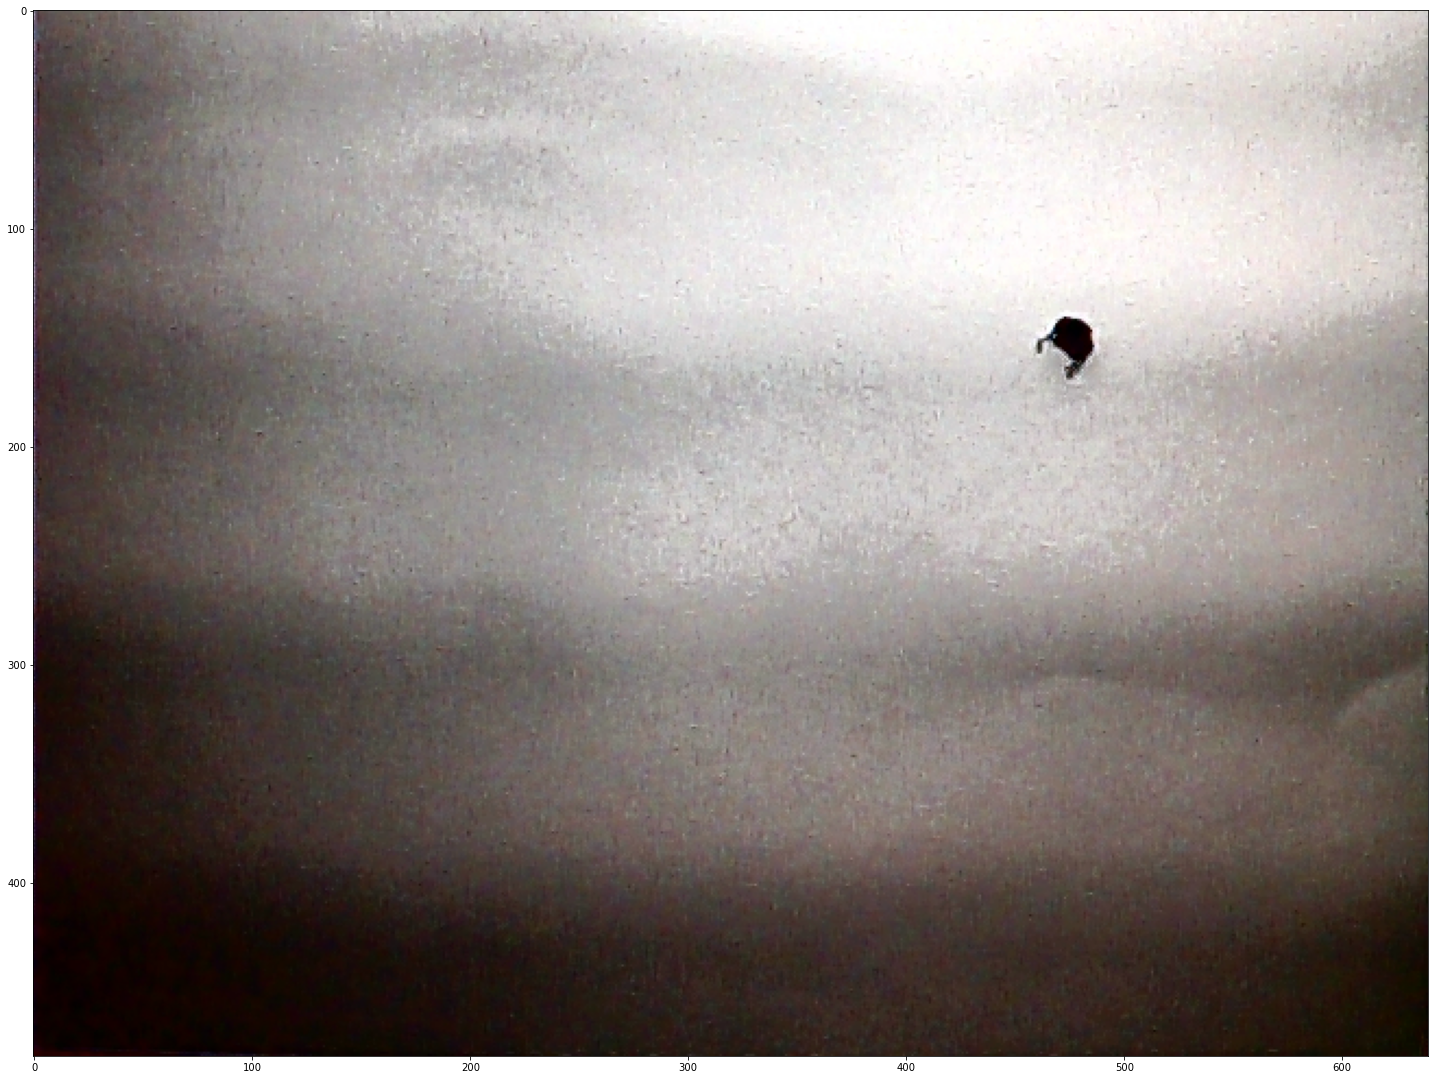

In [2]:
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread("Imagenes/Completo/Switch3/rename/S3-12.png")
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)

plt.figure(figsize=(25,25))
plt.imshow(hist_equalization_result)

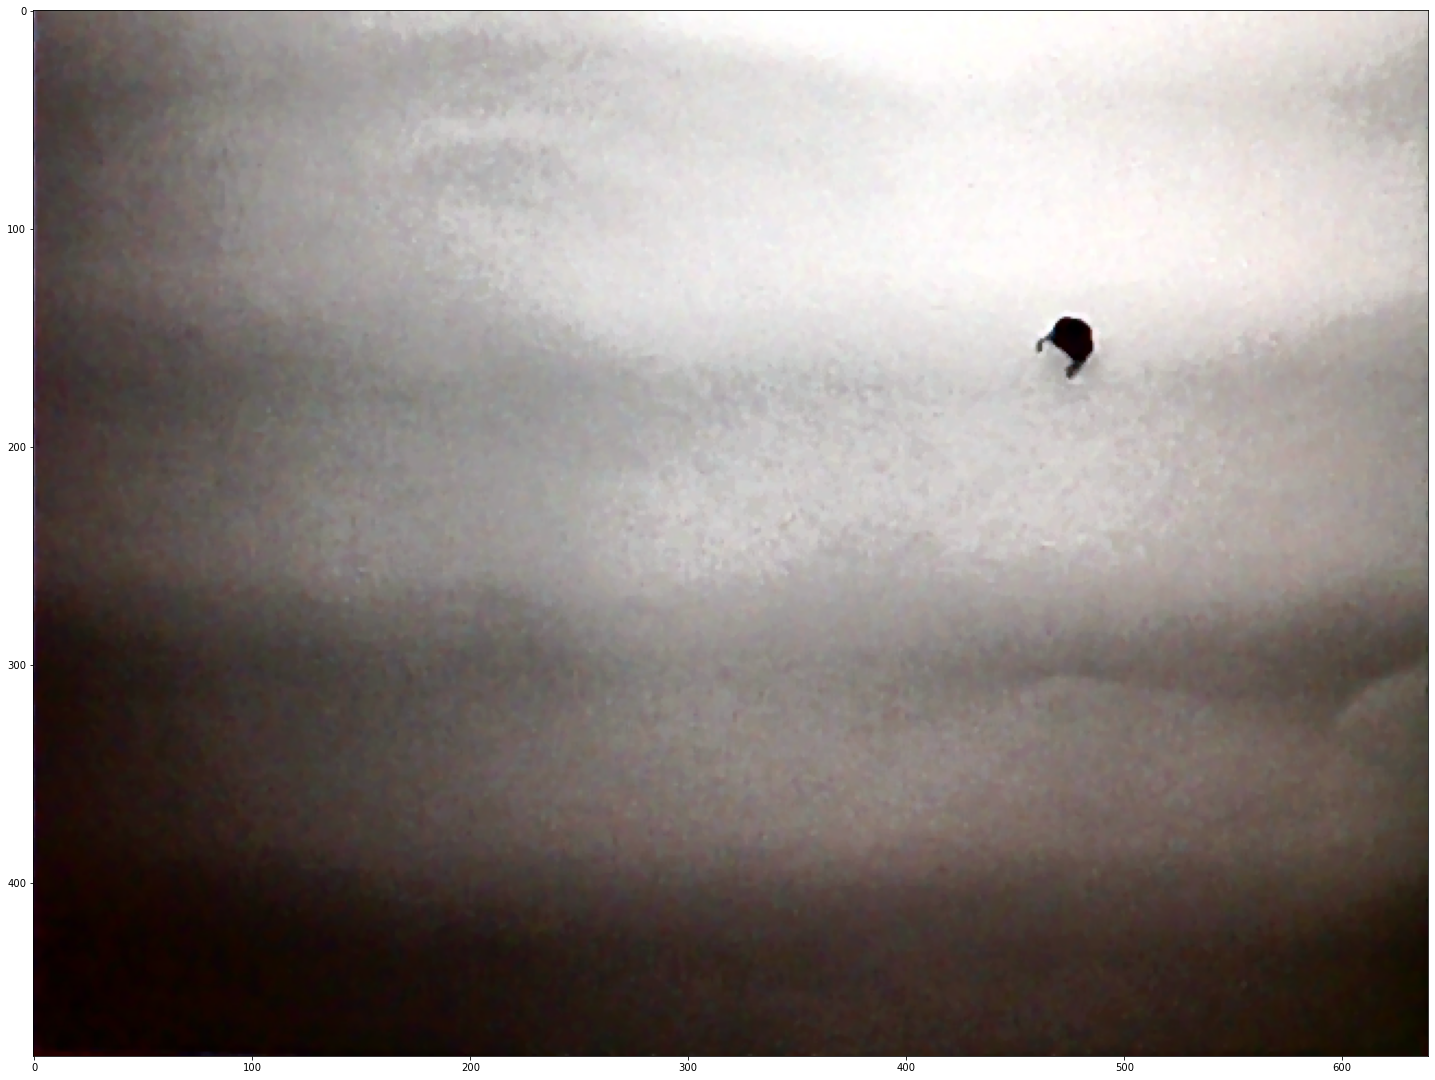

In [3]:
img = cv2.medianBlur(hist_equalization_result,3)

plt.figure(figsize=(25,25))
plt.imshow(img)

In [6]:
import numpy as np
img = cv2.imread("Imagenes/Completo/Switch3/rename/S3-12.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.subtract(255,gray)
ret,thresh = cv2.threshold(gray,5,255,cv2.THRESH_TOZERO)
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel2 = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh,kernel2,iterations = 1)
dilation = cv2.dilate(erosion,kernel1,iterations = 7)

In [7]:
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [192, 172, 177],
        ...,
        [232, 230, 229],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [ 97,  47,  65],
        ...,
        [125, 111,  92],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

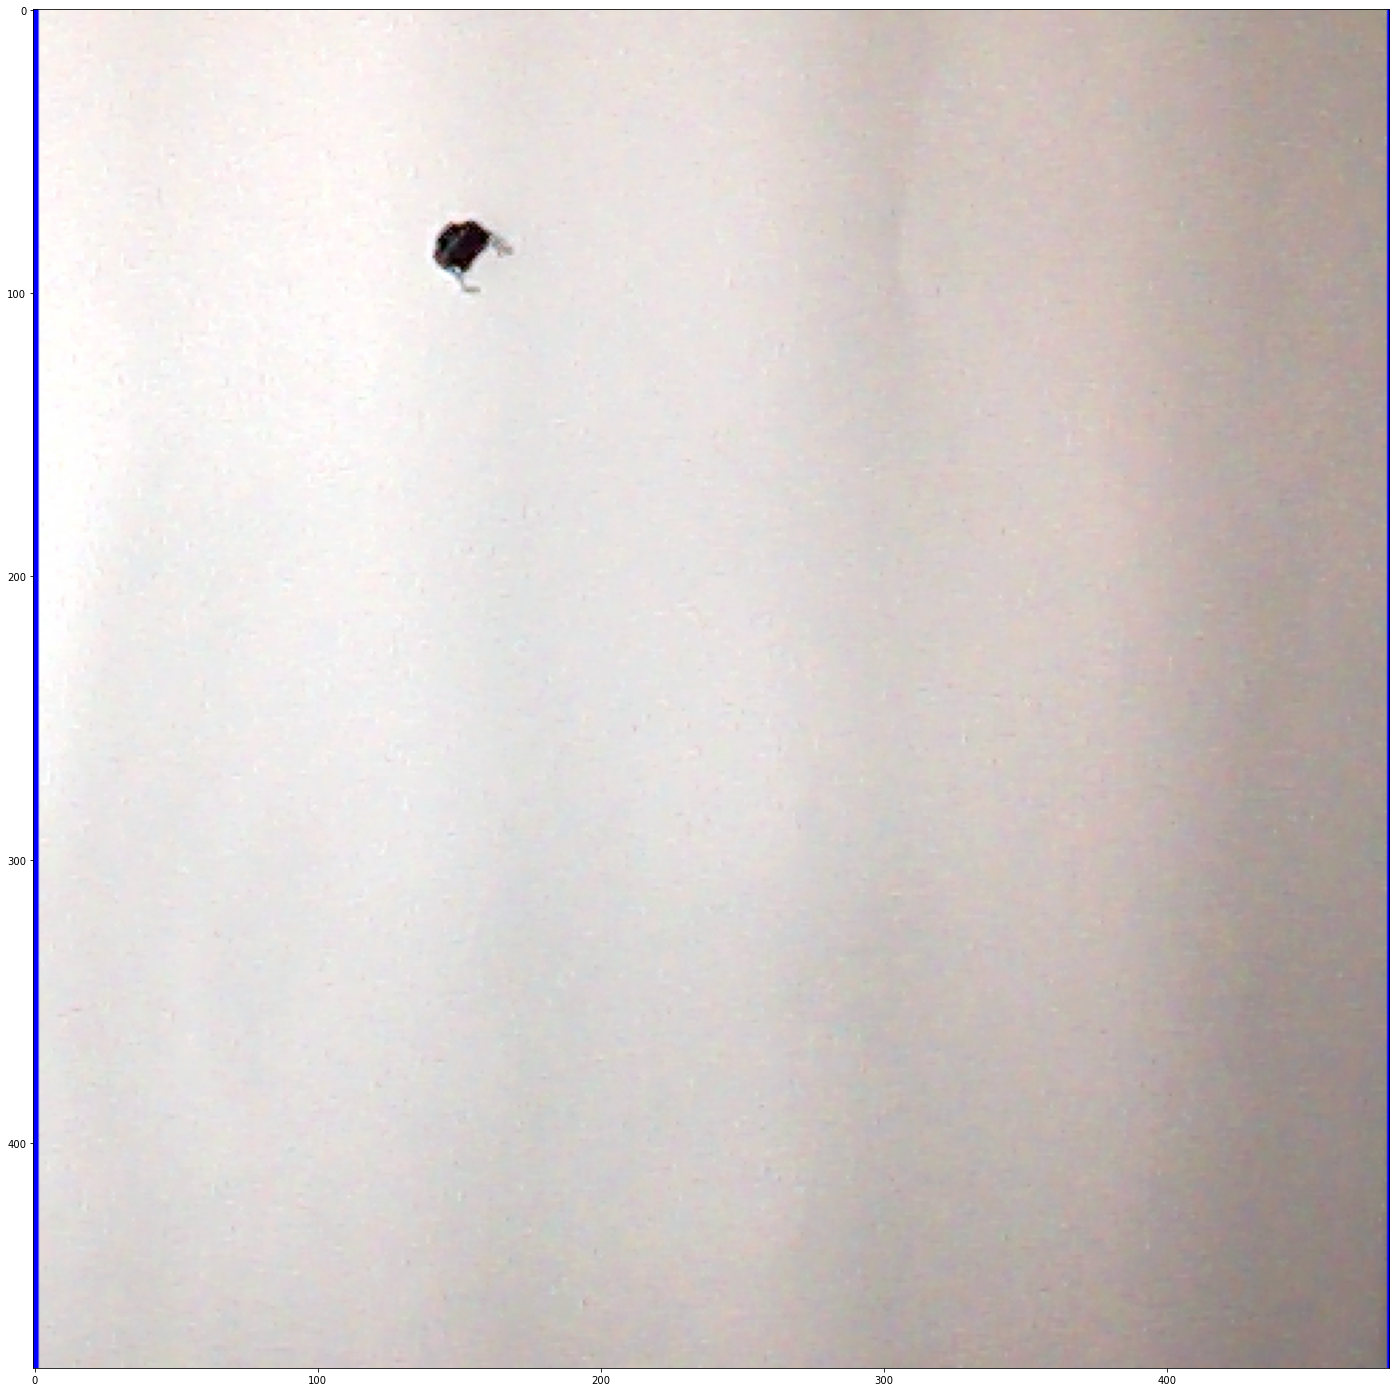

In [8]:
# rotate img
angle = rect[2]
rows,cols = img.shape[0], img.shape[1]
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
img_rot = cv2.warpAffine(img,M,(cols,rows))

# rotate bounding box
rect0 = (rect[0], rect[1], 0.0)
box = cv2.boxPoints(rect)
pts = np.int0(cv2.transform(np.array([box]), M))[0]    
pts[pts < 0] = 0

# crop
img_crop = img_rot[pts[1][1]:pts[0][1], 
                   pts[1][0]:pts[2][0]]
plt.figure(figsize=(25,25))
plt.imshow(img_crop)

In [11]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    
    
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours_poly, i, color)
        cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    
    cv.imshow('Contours', drawing)


parser = argparse.ArgumentParser(description='Code for Creating Bounding boxes and circles for contours tutorial.')
parser.add_argument('--input', help='Path to input image.', default='stuff.jpg')


# Convert image to gray and blur it
src_gray = cv.cvtColor(img_crop, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
source_window = 'Source'
cv.namedWindow(source_window)
cv.imshow(source_window, img_crop)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv.waitKey()

-1